<h1 style=" text-align: right; display: inline;">POTENTIA Mid-year Workshop Project </h1>

## Importing The libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Magic command to display plots inline
%matplotlib inline

# Importing seaborn library for data visualization
import seaborn as sns

# Importing datetime library for working with dates
from datetime import datetime 

# Importing libraries for preprocessing data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

# Exploratory data analysis (EDA)


In [2]:
#reading the data
df = pd.read_csv("taxi-rides.csv")

## General Properties

In [3]:
df.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [4]:
df.product_id.value_counts()

55c66225-fbe7-4fd5-9072-eab1ece5e23e    44204
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    44135
997acbb5-e102-41e1-b155-9df7de0a73f2    44108
6d318bcc-22a3-4af6-bddd-b409bfce1546    44038
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    44024
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43983
6c84fd89-3f11-4782-9b50-97c468b19529    43977
lyft_plus                               41142
lyft_lux                                41041
lyft                                    41015
lyft_luxsuv                             40979
lyft_premier                            40969
lyft_line                               40841
Name: product_id, dtype: int64

#### Product ID has encrypted values so we won't be using it

In [5]:
df.name.value_counts()

UberX           44204
Taxi            44135
UberPool        44108
Black SUV       44038
WAV             44024
UberXL          43983
Black           43977
Lyft XL         41142
Lux Black       41041
Lyft            41015
Lux Black XL    40979
Lux             40969
Shared          40841
Name: name, dtype: int64

#### here all the name values are a mix of lyft and uber so we will seperate them later on

In [6]:
df.shape

(554456, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source            554456 non-null  object 
 5   surge_multiplier  554456 non-null  float64
 6   id                554456 non-null  object 
 7   product_id        554456 non-null  object 
 8   name              554456 non-null  object 
 9   price             510321 non-null  float64
dtypes: float64(4), object(6)
memory usage: 42.3+ MB


In [8]:
df.describe()

,distance,time_stamp,surge_multiplier,price
count,554456.000000,5.544560e+05,554456.000000,510321.000000
mean,2.189834,1.544046e+12,1.013946,16.545307
std,1.139779,6.892123e+08,0.091999,9.322049
min,0.020000,1.543200e+12,1.000000,2.500000
25%,1.270000,1.543440e+12,1.000000,9.000000
50%,2.160000,1.543740e+12,1.000000,13.500000
75%,2.930000,1.544830e+12,1.000000,22.500000
max,7.860000,1.545160e+12,3.000000,97.500000


#### cab_type : is coming as object. Since cabtype is a either uber or lyft we can apply one hot encoding method to it.
#### time_stamp : is coming as float64. Since timestamp indcates date so we can convert it into datetime.
#### there is null values in price (we will handle it later after some invstigation)

# Preprocessing

## Encoding & feature Engineering

In [9]:
# convert timestamp to datetime
# Convert the timestamp column to Int64 type and divide it by 1000 to get the time in seconds
df['time_stamp']=df['time_stamp'].astype('Int64')/1000
# Create a new column 'date' and convert the time_stamp column to datetime
df['date'] = [datetime.fromtimestamp(x)for x in df['time_stamp']]

In [10]:
#remove time from datetime
df.date = df.date.dt.date
df['date'] = df['date'].astype('datetime64[ns]')
#viewing timestamp after converting to date
df[['time_stamp','date']].head()

,time_stamp,date
0,1544770000.0,2018-12-14
1,1543400000.0,2018-11-28
2,1544920000.0,2018-12-16
3,1543620000.0,2018-12-01
4,1543580000.0,2018-11-30


## Encoding categorical columns

### Since we have 2 categories of cabs (Lyft or Uber) and each one os divided to sub categories we can encode each category and sub category in a column of it's own

In [11]:
# appling one hot encoding on cab_type column 
df = pd.get_dummies(df, columns=["cab_type"])

#### This creates two columns (cab_type_Lyft,cab_type_Uber) and removes the cab_type column

In [12]:
df.head()

,distance,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,date,cab_type_Lyft,cab_type_Uber
0,0.62,1544770000.0,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14,0,1
1,2.27,1543400000.0,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28,0,1
2,2.00,1544920000.0,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16,1,0
3,3.98,1543620000.0,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-12-01,1,0
4,1.49,1543580000.0,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30,1,0


#### now we divide each category to it's sub-categories

In [13]:
# we made Lyft_Type coulmn to save ordinal encoding data in it
df = df.assign(Lyft_Type = df[(df.cab_type_Lyft==1)].name) 
df.loc[df.cab_type_Lyft == 0, 'Lyft_Type'] = 0
df = df.drop(['cab_type_Lyft'], axis = 1)
df.head()

,distance,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,date,cab_type_Uber,Lyft_Type
0,0.62,1544770000.0,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14,1,0
1,2.27,1543400000.0,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28,1,0
2,2.00,1544920000.0,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16,0,Lyft
3,3.98,1543620000.0,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-12-01,0,Lyft XL
4,1.49,1543580000.0,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30,0,Lyft


In [14]:
# Define the mappings for the Lyft type
lyft={'Lux Black XL':6,'Lux Black':5,'Lux':4,'Lyft XL':3,'Lyft':2,'Shared':1}
lyft_map=[{'col':'Lyft_Type','mapping':lyft}]

df['Lyft_Type']=df['name']
# Apply the OrdinalEncoder using the Lyft mapping defined earlier
encodeing= ce.OrdinalEncoder(cols=['Lyft_Type'],return_df=True,mapping=lyft_map)
df=encodeing.fit_transform(df)
# Set the values in the Lyft_Type column that are less than 1 to 0
df.loc[df.Lyft_Type <1, 'Lyft_Type'] = 0

In [15]:
# Create a new column "Uber_Type" but only for the rows where the value in the "cab_type_Uber" column is equal to 1.
df = df.assign(Uber_Type = df[df['cab_type_Uber'] ==1].name)

# Set the values in the "Uber_Type" column to 0 where the corresponding value in the "cab_type_Uber" column is 0.
df.loc[df['cab_type_Uber'] == 0, 'Uber_Type'] = 0

# Drop the "cab_type_Uber" column from the dataframe.
df = df.drop(['cab_type_Uber'], axis=1)

# Show the first 5 rows of the updated dataframe.
df.head()


,distance,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,date,Lyft_Type,Uber_Type
0,0.62,1544770000.0,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14,0.0,Taxi
1,2.27,1543400000.0,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28,0.0,UberPool
2,2.00,1544920000.0,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16,2.0,0
3,3.98,1543620000.0,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-12-01,3.0,0
4,1.49,1543580000.0,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30,2.0,0


In [16]:
# Define the mappings for the Lyft type
uber={'Black SUV':6,'Black':5,'WAV':4,'UberXL':3,'UberX':2,'UberPool':1}
uber_map = [{'col':'Uber_Type', 'mapping':uber}]
# Apply the OrdinalEncoder using the Lyft mapping defined earlier
df['Uber_Type']=df['name']
encodeing = ce.OrdinalEncoder(cols=['Uber_Type'], return_df=True, mapping=uber_map)
df= encodeing.fit_transform(df)
# Set the values in the Lyft_Type column that are less than 1 to 0
df.loc[df.Uber_Type <1, 'Uber_Type'] = 0
df


,distance,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,date,Lyft_Type,Uber_Type
0,0.62,1544770000.0,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14,0.0,0.0
1,2.27,1543400000.0,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28,0.0,1.0
2,2.00,1544920000.0,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16,2.0,0.0
3,3.98,1543620000.0,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-12-01,3.0,0.0
4,1.49,1543580000.0,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
554451,1.64,1543620000.0,Back Bay,Northeastern University,1.0,2aa98e8a-4f06-4ae2-9291-036d74094a1b,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,2018-12-01,0.0,3.0
554452,0.92,1543550000.0,North Station,North End,1.0,75cb7a6d-68be-4cc7-b4da-c8e4b997aa8a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,2018-11-30,0.0,6.0
554453,2.66,1543530000.0,Theatre District,Fenway,1.0,569da280-71c6-4459-a343-8573f8613415,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,16.0,2018-11-30,0.0,3.0
554454,2.98,1543650000.0,Theatre District,Boston University,1.0,71d8a3a6-5b0e-4710-a803-dfd5680a590a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,11.5,2018-12-01,0.0,2.0


# handing null values

#### we can that all the null values of price come with uber taxi 

In [19]:
# view number of null values in data
df.isna().sum()

distance                0
time_stamp              0
destination             0
source                  0
surge_multiplier        0
id                      0
product_id              0
name                    0
price               44135
date                    0
Lyft_Type               0
Uber_Type               0
dtype: int64

## Why drop when you can fill the missing values?

In [25]:
df['price'] = df['price'].fillna(df['price'].mean())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   distance            554456 non-null  float64       
 1   time_stamp          554456 non-null  Float64       
 2   destination         554456 non-null  object        
 3   source              554456 non-null  object        
 4   surge_multiplier    554456 non-null  float64       
 5   id                  554455 non-null  object        
 6   product_id          554456 non-null  object        
 7   name                554456 non-null  object        
 8   price               554456 non-null  float64       
 9   date                554456 non-null  datetime64[ns]
 10  Lyft_Type           554456 non-null  float64       
 11  Uber_Type           554456 non-null  float64       
 12  source_destination  554456 non-null  object        
dtypes: Float64(1), datetime64[ns]

### saving a reloading the data to avoid the time taken in running the Null values code again

In [29]:
df.to_csv('edited_ride_prices.csv', index=False)
df=pd.read_csv('edited_ride_prices.csv')
df.head()

,distance,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,date,Lyft_Type,Uber_Type,source_destination
0,0.62,1.544770e+09,West End,Haymarket Square,1.0,7.820671378091872,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,16.545307,2018-12-14,0.0,0.0,West EndHaymarket Square
1,2.27,1.543400e+09,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.000000,2018-11-28,0.0,1.0,Boston UniversityBeacon Hill
2,2.00,1.544920e+09,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.500000,2018-12-16,2.0,0.0,Back BayHaymarket Square
3,3.98,1.543620e+09,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.500000,2018-12-01,3.0,0.0,Financial DistrictNortheastern University
4,1.49,1.543580e+09,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.000000,2018-11-30,2.0,0.0,Back BayNortheastern University


## Reducing dimensionality

### Remove the columns that you won't need or use

In [30]:
#example
df = df.drop(['time_stamp'], axis = 1)

In [31]:
df = df.drop(['id','product_id'], axis=1)

In [32]:
df.head()

,distance,destination,source,surge_multiplier,name,price,date,Lyft_Type,Uber_Type,source_destination
0,0.62,West End,Haymarket Square,1.0,Taxi,16.545307,2018-12-14,0.0,0.0,West EndHaymarket Square
1,2.27,Boston University,Beacon Hill,1.0,UberPool,8.000000,2018-11-28,0.0,1.0,Boston UniversityBeacon Hill
2,2.00,Back Bay,Haymarket Square,1.0,Lyft,10.500000,2018-12-16,2.0,0.0,Back BayHaymarket Square
3,3.98,Financial District,Northeastern University,1.0,Lyft XL,22.500000,2018-12-01,3.0,0.0,Financial DistrictNortheastern University
4,1.49,Back Bay,Northeastern University,1.0,Lyft,7.000000,2018-11-30,2.0,0.0,Back BayNortheastern University


# Outliers handling

## Distance Column

<AxesSubplot: >

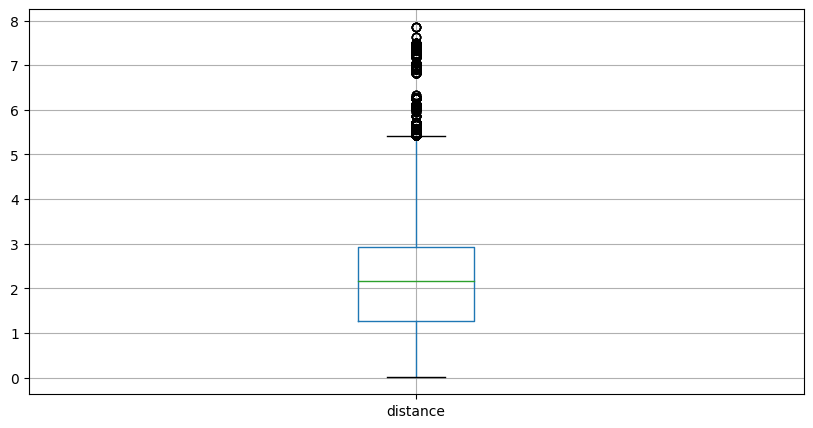

In [33]:
df.boxplot(column =['distance'], grid = True, figsize=(10,5))

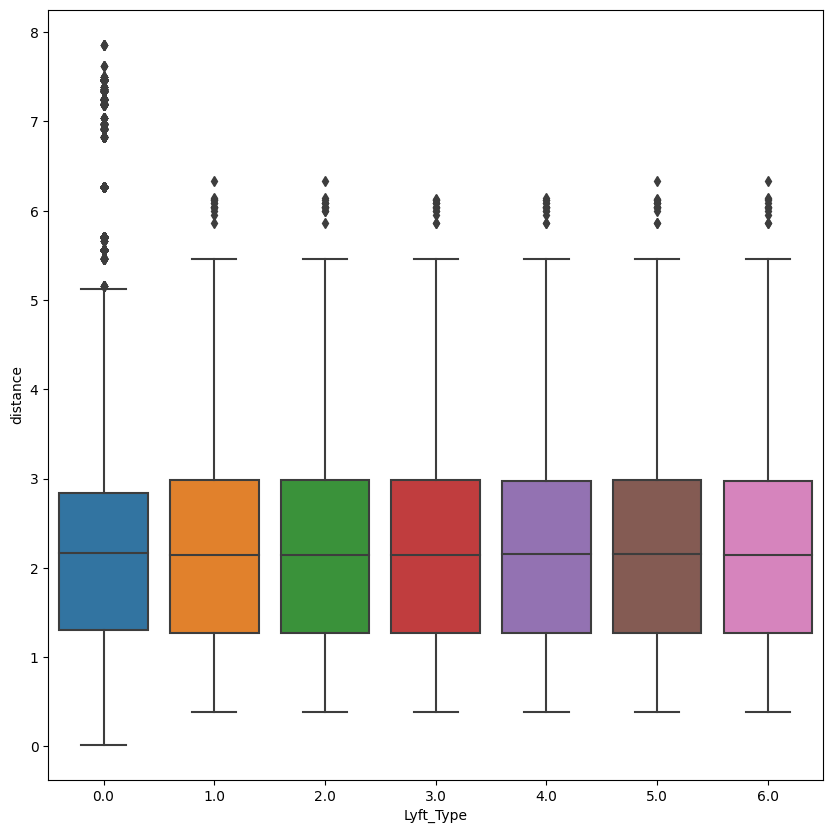

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(y='distance',x='Lyft_Type', data=df)
plt.show()

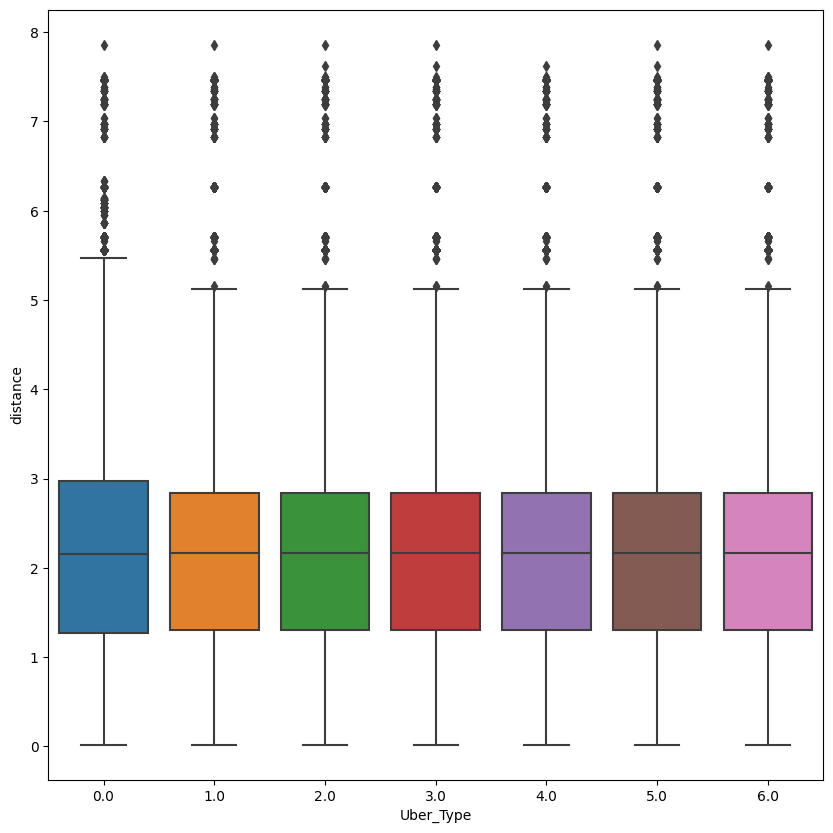

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(y='distance',x='Uber_Type', data=df)
plt.show()

In [36]:
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [37]:
df.shape

(554455, 10)

### Remove the outliers

In [38]:
df = df[(df['distance'] > lower) & (df['distance'] < upper)]

In [39]:
df.shape

(548053, 10)

In [40]:
df.head()

,distance,destination,source,surge_multiplier,name,price,date,Lyft_Type,Uber_Type,source_destination
0,0.62,West End,Haymarket Square,1.0,Taxi,16.545307,2018-12-14,0.0,0.0,West EndHaymarket Square
1,2.27,Boston University,Beacon Hill,1.0,UberPool,8.000000,2018-11-28,0.0,1.0,Boston UniversityBeacon Hill
2,2.00,Back Bay,Haymarket Square,1.0,Lyft,10.500000,2018-12-16,2.0,0.0,Back BayHaymarket Square
3,3.98,Financial District,Northeastern University,1.0,Lyft XL,22.500000,2018-12-01,3.0,0.0,Financial DistrictNortheastern University
4,1.49,Back Bay,Northeastern University,1.0,Lyft,7.000000,2018-11-30,2.0,0.0,Back BayNortheastern University


## Normalizing the data

In [41]:
#using min max scaler
scaler = MinMaxScaler()
df['distance'] = scaler.fit_transform(df[['distance']])


In [42]:
df.describe()

,distance,surge_multiplier,price,Lyft_Type,Uber_Type
count,548053.000000,548053.000000,548053.000000,548053.000000,548053.000000
mean,0.393778,1.014099,16.449694,1.567963,1.655146
std,0.195693,0.092505,8.852062,2.082256,2.104956
min,0.000000,1.000000,2.500000,0.000000,0.000000
25%,0.230056,1.000000,9.500000,0.000000,0.000000
50%,0.393321,1.000000,16.000000,0.000000,0.000000
75%,0.528757,1.000000,22.500000,3.000000,3.000000
max,1.000000,3.000000,97.500000,6.000000,6.000000
